In [1]:
from sklearn.svm import SVC
from sklearn import datasets
import numpy as np
import os

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
iris = datasets.load_iris()
X = iris['data'][:,(2,3)]
y = iris['target']

In [3]:
setosa_or_versicolor = (y==0) | (y==1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

In [4]:
svm_clf = SVC(kernel="linear", C=float("inf"))
svm_clf.fit(X, y)


SVC(C=inf, kernel='linear')

In [5]:
x0 = np.linspace(0, 5.5, 200)

The boundary
$$
\begin{align}
y = w^Tx+b = 0 \\
w_0x_0 + w_1x_1 + b = 0 \\
w_1x_1 = -w_0x_0 - b\\
x_1 = -\frac{w_0}{w_1}x_0 + \frac{b}{w_1}
\end{align}
$$

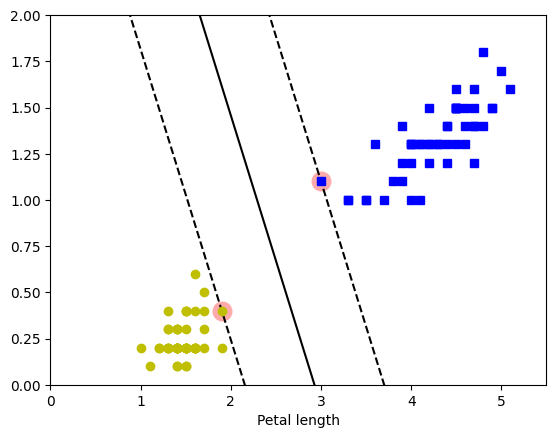

In [9]:
def plot_svm_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]

    margin = 1/w[1]
    upper_margin = decision_boundary + margin
    lower_margin = decision_boundary - margin

    support_vectors = svm_clf.support_vectors_
    plt.scatter(support_vectors[:,0], support_vectors[:,1], s=180, facecolors='#FFAAAA')
    plt.plot(x0, decision_boundary, 'k-')
    plt.plot(x0, upper_margin, 'k--')
    plt.plot(x0, lower_margin, 'k--')

plt.figure()

plot_svm_decision_boundary(svm_clf=svm_clf, xmin=0, xmax=5.5)
plt.plot(X[:,0][y==1], X[:,1][y==1], "bs")
plt.plot(X[:,0][y==0], X[:,1][y==0], "yo")
plt.xlabel('Petal length')
plt.axis([0, 5.5, 0, 2])
plt.show()